            EDA
FER2013 Emotion Dataset for Music Recommendation System
- Input: 7 emotion classes (from FER2013)
- Output: 5 final classes (after mapping)
- Image Size: 48x48 grayscale
- Model: EfficientNet B0 (needs 224x224 RGB)


Already Done
- Images are already 48x48 pixels
- Images are already grayscale
- Face detection already applied (FER2013 is pre-cropped)

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from PIL import Image
import warnings
from tensorflow.keras.preprocessing.image import ImageDataGenerator
warnings.filterwarnings("ignore")

2025-07-14 03:14:08.284437: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-14 03:14:08.349660: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-14 03:14:08.692600: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-14 03:14:08.694437: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-14 03:14:09.966827: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [5]:
data_path = '/app/data/raw/fer2013'
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']



In [3]:
#  Print class distribution
def print_class_distribution():
    print("\nCLASS DISTRIBUTION REPORT\n" + "-"*60)
    for split in ['train', 'test']:
        print(f"\n{split.upper()} SET ANALYSIS:\n" + "-"*40)
        split_path = os.path.join(data_path, split)
        total = 0
        class_counts = {}
        for cls in emotion_labels:
            cls_path = os.path.join(split_path, cls)
            count = len(os.listdir(cls_path))
            class_counts[cls] = count
            total += count
        for cls in emotion_labels:
            print(f"  {cls:<9}: {class_counts[cls]:>5} images")
        print(f"  TOTAL     : {total} images")

print_class_distribution()


CLASS DISTRIBUTION REPORT
------------------------------------------------------------

TRAIN SET ANALYSIS:
----------------------------------------
  angry    :  3995 images
  disgust  :   436 images
  fear     :  4097 images
  happy    :  7215 images
  neutral  :  4965 images
  sad      :  4830 images
  surprise :  3171 images
  TOTAL     : 28709 images

TEST SET ANALYSIS:
----------------------------------------
  angry    :   958 images
  disgust  :   111 images
  fear     :  1024 images
  happy    :  1774 images
  neutral  :  1233 images
  sad      :  1247 images
  surprise :   831 images
  TOTAL     : 7178 images


In [4]:
# Class mapping
print("Defining class mappings:")
project_mapping = {
    'angry': 'angry',
    'disgust': 'angry',
    'fear': 'stressed',
    'happy': 'happy',
    'sad': 'sad',
    'surprise': 'stressed',
    'neutral': 'neutral'
}
print("Project-specific emotion mapping defined.\n")
print("FER2013 → Project Mapped Classes:")
for original, mapped in project_mapping.items():
    print(f"  {original:<10} → {mapped}")


final_classes = ['angry', 'happy', 'sad', 'stressed', 'neutral']
original_classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

print("\n Final Classes Used in Project:", final_classes)
print("\n ")
print(" Original FER2013 Classes     :", original_classes)

Defining class mappings:
Project-specific emotion mapping defined.

FER2013 → Project Mapped Classes:
  angry      → angry
  disgust    → angry
  fear       → stressed
  happy      → happy
  sad        → sad
  surprise   → stressed
  neutral    → neutral

 Final Classes Used in Project: ['angry', 'happy', 'sad', 'stressed', 'neutral']

 
 Original FER2013 Classes     : ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [5]:
print("Checking if train and test folders exist:")
print("Train exists?", os.path.exists(os.path.join(data_path, "train")))
print("Test exists?", os.path.exists(os.path.join(data_path, "test")))

Checking if train and test folders exist:
Train exists? True
Test exists? True


In [6]:
# Class Distributions
def compute_class_distributions():
    print("Computing class distributions for FER2013")

    original_dist = {'train': defaultdict(int), 'test': defaultdict(int)}
    mapped_dist = {'train': defaultdict(int), 'test': defaultdict(int)}

    for split in ['train', 'test']:
        print(f"\nAnalyzing '{split}' set:")
        split_path = os.path.join(data_path, split)
        
        for cls in os.listdir(split_path):
            cls_path = os.path.join(split_path, cls)
            if os.path.isdir(cls_path):
                count = len([
                    f for f in os.listdir(cls_path)
                    if f.lower().endswith(('.png', '.jpg', '.jpeg'))
                ])
                
                original_dist[split][cls] += count
                mapped_cls = project_mapping.get(cls)
                if mapped_cls:
                    mapped_dist[split][mapped_cls] += count
                
                print(f"  • Found {count} images in '{cls}' → Mapped to '{mapped_cls}'")

    print("\nFinished computing class distributions.")
    return original_dist, mapped_dist

original_dist, mapped_dist = compute_class_distributions()

# summary of mapped class distributions with totals
print("\nSummary of Mapped Class Distribution:")
for split in ['train', 'test']:
    print(f"\n{split.upper()} SET:")
    total_images = 0
    for cls, count in mapped_dist[split].items():
        print(f"  {cls:<10}: {count} images")
        total_images += count
    print(f"  {'TOTAL':<10}: {total_images} images")

Computing class distributions for FER2013

Analyzing 'train' set:
  • Found 3995 images in 'angry' → Mapped to 'angry'
  • Found 436 images in 'disgust' → Mapped to 'angry'
  • Found 4097 images in 'fear' → Mapped to 'stressed'
  • Found 7215 images in 'happy' → Mapped to 'happy'
  • Found 4965 images in 'neutral' → Mapped to 'neutral'
  • Found 4830 images in 'sad' → Mapped to 'sad'
  • Found 3171 images in 'surprise' → Mapped to 'stressed'

Analyzing 'test' set:
  • Found 958 images in 'angry' → Mapped to 'angry'
  • Found 111 images in 'disgust' → Mapped to 'angry'
  • Found 1024 images in 'fear' → Mapped to 'stressed'
  • Found 1774 images in 'happy' → Mapped to 'happy'
  • Found 1233 images in 'neutral' → Mapped to 'neutral'
  • Found 1247 images in 'sad' → Mapped to 'sad'
  • Found 831 images in 'surprise' → Mapped to 'stressed'

Finished computing class distributions.

Summary of Mapped Class Distribution:

TRAIN SET:
  angry     : 4431 images
  stressed  : 7268 images
  happy  

Plotting pie chart comparison of class ratios.

 


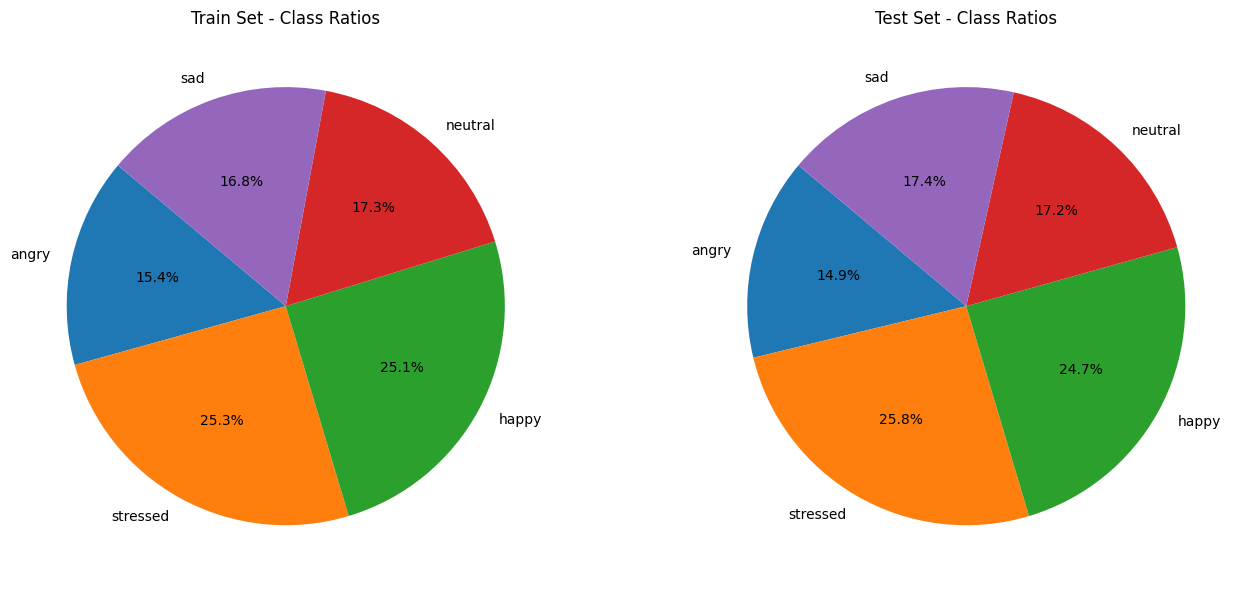

In [7]:
#pie chart comparison of class ratios 
def plot_pie_comparison(mapped_dist):
    print("Plotting pie chart comparison of class ratios.")
    print("\n ")
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    for i, split in enumerate(['train', 'test']):
        data = mapped_dist[split]
        axs[i].pie(data.values(), labels=data.keys(), autopct='%1.1f%%', startangle=140)
        axs[i].set_title(f'{split.capitalize()} Set - Class Ratios')
    plt.tight_layout()
    plt.show()

plot_pie_comparison(mapped_dist)


In [8]:
#  Corrupted Images
def check_corrupted_images(data_path):
    print("Checking for corrupted images in the dataset...")
    corrupted_files = []

    for split in ['train', 'test']:
        split_path = os.path.join(data_path, split)
        

        for emotion in os.listdir(split_path):
            emotion_path = os.path.join(split_path, emotion)

            if not os.path.isdir(emotion_path):
                continue

            for img_file in os.listdir(emotion_path):
                img_path = os.path.join(emotion_path, img_file)
                try:
                    with Image.open(img_path) as img:
                        img.verify()  # Check if image is corrupted
                except Exception as e:
                    print(f"Corrupted: {img_path} ({str(e)})")
                    corrupted_files.append(img_path)
        print(f"Scanned {split} folder.")

    print(f"\n Total corrupted files found: {len(corrupted_files)}")
    return corrupted_files


corrupted_images = check_corrupted_images(data_path)

Checking for corrupted images in the dataset...
Scanned train folder.
Scanned test folder.

 Total corrupted files found: 0


In [9]:
#  Class Imbalance Ratios
def calculate_imbalance_ratios(mapped_dist):
    print("\n Calculating Class Imbalance Ratios...\n")
    imbalance_info = {}

    for split in ['train', 'test']:
        dist = mapped_dist.get(split, {})
        total = sum(dist.values())

        if total == 0:
            print(f" No data found for {split}. Skipping...")
            continue

        ratios = {cls: round((count / total) * 100, 2) for cls, count in dist.items()}
        sorted_ratios = dict(sorted(ratios.items(), key=lambda item: item[1], reverse=True))
        imbalance_info[split] = sorted_ratios

        print(f" {split.upper()} Set Ratios:")
        for cls, pct in sorted_ratios.items():
            print(f"   - {cls:<10}: {pct}%")
        print()

    return imbalance_info

imbalance_info = calculate_imbalance_ratios(mapped_dist)


 Calculating Class Imbalance Ratios...

 TRAIN Set Ratios:
   - stressed  : 25.32%
   - happy     : 25.13%
   - neutral   : 17.29%
   - sad       : 16.82%
   - angry     : 15.43%

 TEST Set Ratios:
   - stressed  : 25.84%
   - happy     : 24.71%
   - sad       : 17.37%
   - neutral   : 17.18%
   - angry     : 14.89%



Showing image augmentations...


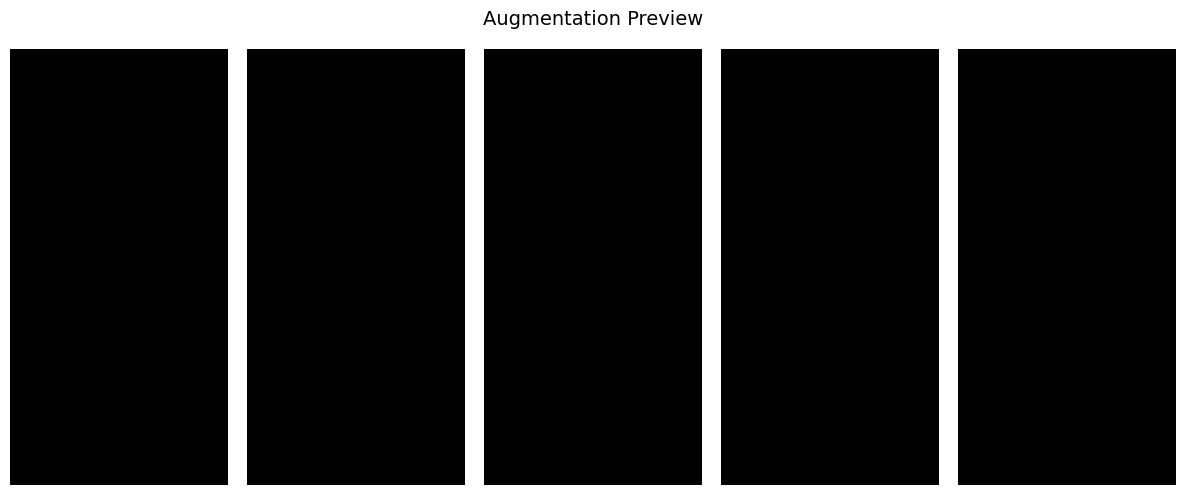

In [10]:
#  Augmentation Grid
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def show_augmentation_grid(sample_img):
    """
    Displays a grid of 10 augmented versions of a single grayscale 48x48 image.
    """
    print("Showing image augmentations...")

    #Ensures the input image is 48×48 (FER2013 standard) grayscale format
    if sample_img.shape != (48, 48):
        raise ValueError(f"Expected input shape (48, 48), got {sample_img.shape}")

    # Reshapes it from (48, 48) to (1, 48, 48, 1) to match Keras' expected input.
    sample_img = np.expand_dims(sample_img, axis=(0, -1)).astype('float32')
    sample_img /= 255.0  # Normalize to [0, 1]

    # Create ImageDataGenerator with augmentations
    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        brightness_range=[0.9, 1.1],#adjust brightness
        zoom_range=0.05,#slight zoom in/out
        horizontal_flip=True,#mirror images
        fill_mode='nearest'#ills empty pixels after transforms
    )

    # Plot 10 augmentations
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    for i, batch in enumerate(datagen.flow(sample_img, batch_size=1)):
        ax = axes[i // 5, i % 5]
        ax.imshow(batch[0].reshape(48, 48), cmap='gray')
        ax.axis('off')
        if i == 9:
            break

    plt.suptitle("Augmentation Preview", fontsize=14)
    plt.tight_layout()
    plt.show()

test_img = np.random.randint(0, 256, (48, 48), dtype=np.uint8)
show_augmentation_grid(test_img)

In [6]:
# Image quality statistics
def get_image_statistics(image):
    brightness = np.mean(image)
    contrast = np.std(image)
    edges = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=3)
    edge_density = np.mean(np.abs(edges))
    return brightness, contrast, edge_density

Statistics for train split:
Number of images analyzed: 6436
Mean Brightness: 130.52
Mean Contrast: 53.94
Mean Edge Density: 20.51


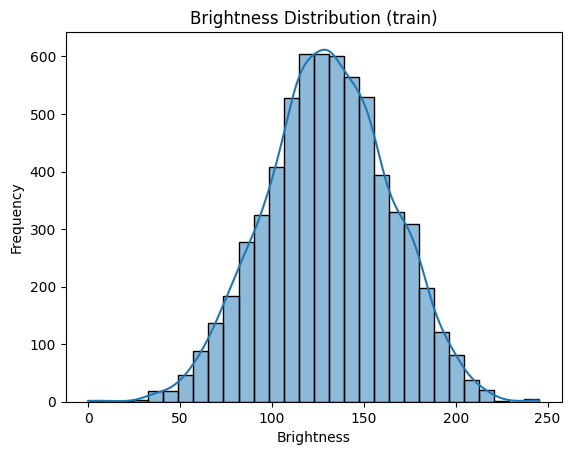

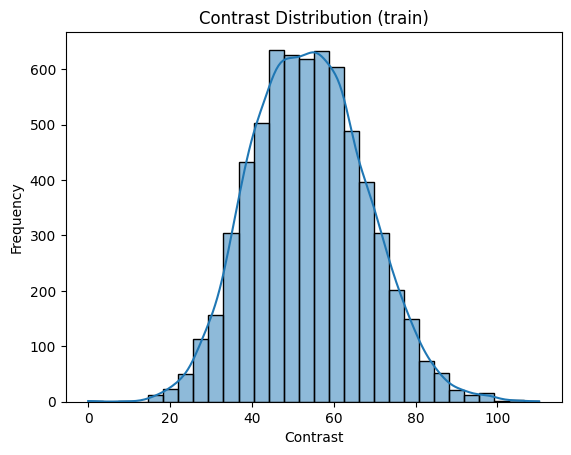

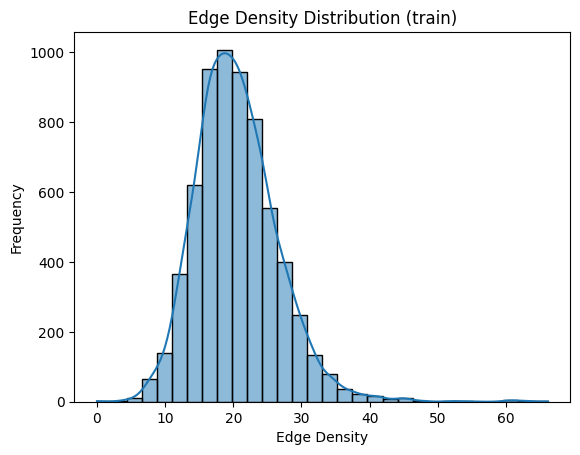

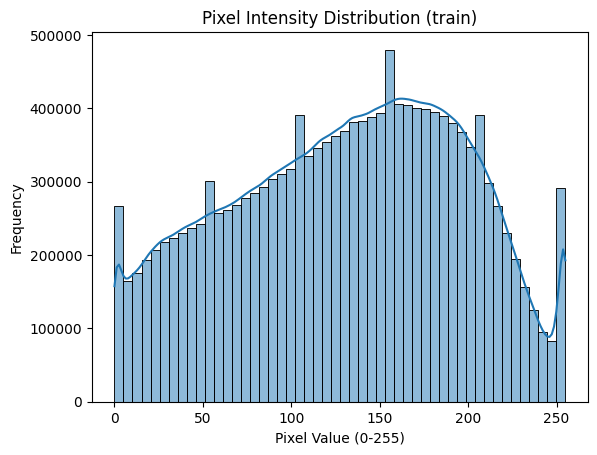

In [7]:
#  Dataset quality metrics
def compute_quality_stats(split='train', sample_limit=1000):
    split_path = os.path.join(data_path, split)
    brightness_list, contrast_list, edge_density_list, all_pixels = [], [], [], []

    for cls in emotion_labels:
        cls_path = os.path.join(split_path, cls)
        images = os.listdir(cls_path)[:sample_limit]
        for img_name in images:
            img_path = os.path.join(cls_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            brightness, contrast, edge_density = get_image_statistics(img)
            brightness_list.append(brightness)
            contrast_list.append(contrast)
            edge_density_list.append(edge_density)
            all_pixels.extend(img.flatten())
    return brightness_list, contrast_list, edge_density_list, all_pixels

def print_and_plot_stats(brightness_list, contrast_list, edge_density_list, all_pixels, split='train'):
    print(f"Statistics for {split} split:")
    print(f"Number of images analyzed: {len(brightness_list)}")
    print(f"Mean Brightness: {np.mean(brightness_list):.2f}")
    print(f"Mean Contrast: {np.mean(contrast_list):.2f}")
    print(f"Mean Edge Density: {np.mean(edge_density_list):.2f}")
    
    sns.histplot(brightness_list, bins=30, kde=True)
    plt.title(f"Brightness Distribution ({split})")
    plt.xlabel("Brightness")
    plt.ylabel("Frequency")
    plt.show()
    
    sns.histplot(contrast_list, bins=30, kde=True)
    plt.title(f"Contrast Distribution ({split})")
    plt.xlabel("Contrast")
    plt.ylabel("Frequency")
    plt.show()
    
    sns.histplot(edge_density_list, bins=30, kde=True)
    plt.title(f"Edge Density Distribution ({split})")
    plt.xlabel("Edge Density")
    plt.ylabel("Frequency")
    plt.show()
    
    sns.histplot(all_pixels, bins=50, kde=True)
    plt.title(f"Pixel Intensity Distribution ({split})")
    plt.xlabel("Pixel Value (0-255)")
    plt.ylabel("Frequency")
    plt.show()

# Run analysis for train split 
brightness, contrast, edge_density, pixels = compute_quality_stats(split='train')
print_and_plot_stats(brightness, contrast, edge_density, pixels, split='train')


In [ ]:
# #  Plot all EDA visuals
# def plot_full_eda(split='train'):
#     brightness_list, contrast_list, edge_density_list, all_pixels = compute_quality_stats(split)

#     fig, axes = plt.subplots(2, 3, figsize=(18, 10))
#     fig.suptitle(f"FER2013 Dataset - Image Quality Analysis ({split.upper()} set)", fontsize=16, weight='bold')

#     # Brightness Distribution
#     axes[0, 0].hist(brightness_list, bins=30, color='skyblue', edgecolor='black')
#     axes[0, 0].axvline(np.mean(brightness_list), color='red', linestyle='--')
#     axes[0, 0].set_title("Brightness Distribution\n(Average Pixel Intensity)")
#     axes[0, 0].set_xlabel("Brightness (0-255)")
#     axes[0, 0].set_ylabel("Frequency")

#     # Contrast Distribution
#     axes[0, 1].hist(contrast_list, bins=30, color='lightcoral', edgecolor='black')
#     axes[0, 1].axvline(np.mean(contrast_list), color='red', linestyle='--')
#     axes[0, 1].set_title("Contrast Distribution\n(Pixel Standard Deviation)")
#     axes[0, 1].set_xlabel("Contrast")
#     axes[0, 1].set_ylabel("Frequency")

#     # Edge Density Distribution
#     axes[0, 2].hist(edge_density_list, bins=30, color='lightgreen', edgecolor='black')
#     axes[0, 2].axvline(np.mean(edge_density_list), color='red', linestyle='--')
#     axes[0, 2].set_title("Edge Density Distribution\n(Texture/Detail Level)")
#     axes[0, 2].set_xlabel("Edge Density")
#     axes[0, 2].set_ylabel("Frequency")

#     # Overall Pixel Intensity
#     axes[1, 0].hist(all_pixels, bins=50, color='purple')
#     axes[1, 0].set_title("Overall Pixel Intensity Distribution")
#     axes[1, 0].set_xlabel("Pixel Intensity (0-255)")
#     axes[1, 0].set_ylabel("Frequency")

#     # Brightness vs Contrast Scatter
#     axes[1, 1].scatter(brightness_list, contrast_list, alpha=0.7)
#     axes[1, 1].set_title("Brightness vs Contrast")
#     axes[1, 1].set_xlabel("Brightness")
#     axes[1, 1].set_ylabel("Contrast")

#     # Dataset Summary Box
#     summary_text = (
#         f"DATASET SUMMARY:\n"
#         f"Image Format : 48x48 grayscale\n"
#         f"Total Images : {len(brightness_list)}\n"
#         f"Avg Brightness: {np.mean(brightness_list):.1f}\n"
#         f"Avg Contrast : {np.mean(contrast_list):.1f}\n"
#         f"Avg Edge Density: {np.mean(edge_density_list):.1f}\n"
#         f"\nQuality Indicators:\n"
#         f"✓ Balanced brightness levels\n"
#         f"✓ Rich texture details"
#     )
#     axes[1, 2].axis('off')
#     axes[1, 2].text(0.1, 0.5, summary_text, fontsize=12, va='center', ha='left', fontfamily='monospace')

#     plt.tight_layout(rect=[0, 0, 1, 0.95])
#     plt.show()
